In [66]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset

# Introducing Pandas Objects

Objek penting untuk menyimpan data:
1. Series

> Series adalah struktur data satu dimensi dalam pandas. Series adalah array homogen dari data yang terindeks.

2. DataFrame

> DataFrame adalah struktur data tabular berupa tabel dua dimensi yang terdiri dari baris dan kolom.

3. Index

> Index adalah objek yang merepresentasikan label pada DataFrame atau Series. Index pada DataFrame menyatakan label pada baris dan kolom, sedangkan pada Series, Index menyatakan label pada setiap elemen.

In [67]:
#=================== PANDAS SERIES =======================#
print(50 * '=')
print('Pandas Series')
print(50 * '=')

data = pd.Series([0.25, 0.5, 0.75, 1.0])
print("Series : \n", data)
print("Access values of Series  :\n", data.values)
print("Access indixes of Series :\n", data.index)

# NOTE:
# - Series as NumPy array
#     it may look like the Series object is basically interchangeable
#       with a one-dimensional NumPy array.
#     The difference is the presence of the index, NumPy array has 
#       implicitly defined integer index, the Series has explicitly 
#       defined index associated with the values.

#==================== DATAFRAME ==========================#
print(50 * '=')
print('Pandas DataFrame')
print(50 * '=')
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
population = pd.Series(population_dict)
area = pd.Series(area_dict)
dataframe = pd.DataFrame({"population": population,
                          "area": area})
print()
print("DataFrame:\n", dataframe)

#========================= INDEX ==========================#
print(50 * '=')
print('Pandas Index')
print(50 * '=')
ind = pd.Index([2, 3, 5, 7, 11])
print()
print("Index\n",  ind)

Pandas Series
Series : 
 0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
Access values of Series  :
 [0.25 0.5  0.75 1.  ]
Access indixes of Series :
 RangeIndex(start=0, stop=4, step=1)
Pandas DataFrame

DataFrame:
             population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995
Pandas Index

Index
 Int64Index([2, 3, 5, 7, 11], dtype='int64')


# Data Indexing and Selection


In [68]:
#===================== DATA SELECTION IN SERIES =======================#
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
print("data\n", data)

# Series as dictionary
print(50 * '=')
print('Series indexing as Dictionary')
print(50 * '=')
print("Get value with index 'a' =", data['a'])
print("is 'a' in data? " 'a' in data)
print("Get all keys = ", data.keys())
print("Get all items = ", list(data.items()))

# Series as numpy array
print(50 * '=')
print('Series indexing as Numpy Array')
print(50 * '=')
print("Slicing by explicit index =\n", data['a':'c'])
print("Masking =\n", data[(data > 0.3) & (data < 0.8)])
print("Fancy indexing =\n", data[['a', 'c']])

# Indexing explicit and implicit way
print(50 * '=')
print('Series indexing explicit and implicit way')
print(50 * '=')
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
print("Reference explicit index '1' = ", data.loc[1])
print("Reference explicit index '1' to '3' = ", data.loc[1:3])
print("Reference implicit index 1 = ", data.iloc[1])
print("Reference implicit index 1 to 3 = ", data.iloc[1:3])

# NOTE:
# 1. Using .loc ==> Explicit way (based on index and/or index actual names)
# 2. Using .iloc ==> Implicit way (based on order number of index and/or column)

print(70 * '=')
#===================== DATA SELECTION IN DATAFRAME =======================#
# DataFrame as dictionary
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
print(data)

# DataFrame as dictionary
print(50 * '=')
print('DataFrame selection as Dictionary')
print(50 * '=')
print("Get area column =\n", data['area'])

# NOTE: by default dataframe['columName'] similar to dictionary['key'].
#       CANNOT dataframe['columnName', 'IndexNme'] (throw error).

# Selecting explicit and implicit way
print(50 * '=')
print('DataFrame selection explicit and implicit way')
print(50 * '=')
print("Reference explicit indexing =\n", data.loc[:"Illinois", :"pop"])
print("Reference implicit index 1 to 3 =\n", data.iloc[:3, :2])

# NOTE:
# 1. Using .loc ==> Explicit way (based on index and/or index actual names)
# 2. Using .iloc ==> Implicit way (based on order number of index and/or column)

data
 a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
Series indexing as Dictionary
Get value with index 'a' = 0.25
False
Get all keys =  Index(['a', 'b', 'c', 'd'], dtype='object')
Get all items =  [('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]
Series indexing as Numpy Array
Slicing by explicit index =
 a    0.25
b    0.50
c    0.75
dtype: float64
Masking =
 b    0.50
c    0.75
dtype: float64
Fancy indexing =
 a    0.25
c    0.75
dtype: float64
Series indexing explicit and implicit way
Reference explicit index '1' =  a
Reference explicit index '1' to '3' =  1    a
3    b
dtype: object
Reference implicit index 1 =  b
Reference implicit index 1 to 3 =  3    b
5    c
dtype: object
              area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135
DataFrame selection as Dictionary
Get area column =
 California    423967
Texas         695662
New York      141297
Florida    

# Hierarchical Indexing

General Concept:
1. Create MultiIndex Object.
2. Set the MultiIndex as the Index/column.

In [69]:
#============== MULTIINDEX FOR INDICES ==================#
print(50 * '=')
print("MULTIINDEX FOR INDICES")
print(50 * '=')

# Create example data
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations)
print("initial data =\n", pop)

# Create MultiIndex object
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
          ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)
pop.index = index
pop.index.names = ['state', 'year'] # Rename the indices
print("\nafter =\n", pop)

# NOTE:
# - Indexing (explicit way):
#     Series[index_lvl 0][index_lvl 1][index_lvl 2]
#     or Series.loc[index_lvl 0, index_lvl 1, index_lvl 2]
print("\nGet value of California 2010 =", pop['California'][2010])
print("Get all values in year 2000 =\n", pop[:, 2000])
print("Fancy indexing =\n", pop[['California', 'Texas']])
print("Get all values with state California and Texas but in year 2000 =\n",
      pop.loc[['California', 'Texas'], 2010])


#============= MULTIINDEX FOR COLUMNS ==================#
print(50 * '=')
print('MULTIINDEX FOR COLUMNS')
print(50 * '=')
# Create MultiIndex object
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([["Bob", "Guido", "Sue"], ["HR", "Temp"]],
                                     names=['subject', "type"])

# Create example data
rand = np.random.RandomState(1)
data = np.round(rand.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

health_data = pd.DataFrame(data, index=index, columns=columns)
print("\nData: \n", health_data)

# NOTE:
# - Selecting (explicit way):
#     DataFrame.loc[(index_lvl1, index_lvl2), (col_lvl1, col_lvl2)]

print("Get all values for Bob from HR in year 2013\n", health_data.loc[(2013, ), ('Bob', "HR")])

#============= SORTING MULTI-INDICES ==================#
index = pd.MultiIndex.from_product([['a', 'b', 'c',], [1, 2]])
data = pd.Series(rand.rand(6), index=index)
data.index.names = ['char', 'int']

# sorting by indices
print("the data:\n ", data)
print("sort based on index level 1:\n", data.sort_index(level=1))

MULTIINDEX FOR INDICES
initial data =
 0    33871648
1    37253956
2    18976457
3    19378102
4    20851820
5    25145561
dtype: int64

after =
 state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Get value of California 2010 = 37253956
Get all values in year 2000 =
 state
California    33871648
New York      18976457
Texas         20851820
dtype: int64
Fancy indexing =
 state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64
Get all values with state California and Texas but in year 2000 =
 state       year
California  2010    37253956
Texas       2010    25145561
dtype: int64
MULTIINDEX FOR COLUMNS

Data: 
 subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                   

# Stack and Unstack Rearranging
- Stack ==> Set column (the latest level) into index (at the latest level)
- Unstack ==> Set index (the latest level) into column (at the latest level)

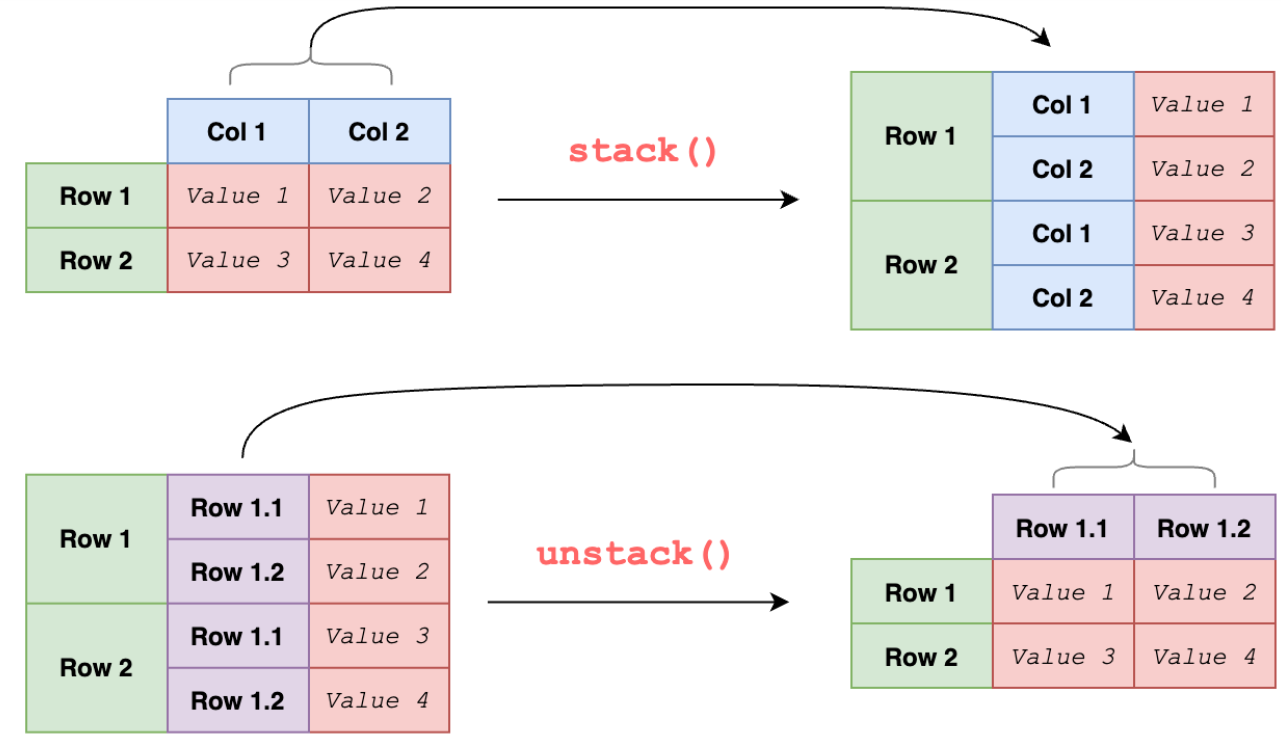

In [70]:
#============= STACK UNSTACK FRAME ==================#
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations)

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
          ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)
pop.index = index
pop.index.names = ['state', 'year']
print("Initial =\n", pop)
print()

# stacked and unstacked

print("Example unstacked data:\n", pop.unstack())
print()
print("Example stacked (the unstacked) data:\n", pop.unstack().stack())

Initial =
 state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Example unstacked data:
 year            2000      2010
state                         
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

Example stacked (the unstacked) data:
 state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


# Combining Dataset (Based its axis)

In [71]:
#====================== SERIES PANDAS CONCAT ==============================#
# Menggabungkan objek-objek Pandas berdasarkan sumbu tertentu (axis=0,1, dll)
#  jika axis=0 -> menyesuaikan posisi kolom
#  jika axis=1 -> menyesuaikan posisi index

print(50 * '=')
print('SERIES CONCAT')
print(50 * '=')
# Simple case
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
print("Series 1 :\n", ser1)
print("Series 2 :\n", ser2)
print("Example concat Series (axis = 0) :\n", 
      pd.concat([ser1, ser2], axis=0))
print("Example concat Series (axis = 1) :\n", 
      pd.concat([ser1, ser2], axis=1))

#====================== SERIES PANDAS CONCAT ==============================#
# Menggabungkan objek-objek Pandas berdasarkan sumbu tertentu (axis=0,1, dll)
#  jika axis=0 -> menyesuaikan posisi kolom
#  jika axis=1 -> menyesuaikan posisi index

print(50 * '=')
print('DATAFRAME CONCAT')
print(50 * '=')
df1 = pd.DataFrame({'A': ['A1', 'A2'],
                    'B': ['B1', 'B2']})
df2 = pd.DataFrame({'A': ['A3', 'A4'],
                    'B': ['B3', 'B4']})
print('\n1. SIMPLE CCONCAT DATAFRAME:\n')
print("Dataframe 1 :\n", df1)
print("Dataframe 2 :\n", df2)
print("Example concat dataframe (on axis-0) :\n", pd.concat([df1, df2], axis=0))
print("Example concat dataframe (on axis-1) :\n", pd.concat([df1, df2], axis=1))
print("NOTE: the repeated indices (or columns) in the result commonly undesirable")

print('\n2. IGNORING THE INDEX DATAFRAME:\n')
print("Dataframe 1 :\n", df1)
print("Dataframe 2 :\n", df2)
print("Example concat dataframe (on axis-0); ignoring index :\n",
      pd.concat([df1, df2], axis=0, ignore_index=True))

print("\n3.ADDING MULTIINDEX KEYS:\n")
print("Dataframe 1 :\n", df1)
print("Dataframe 2 :\n", df2)
print("Example concat dataframe (on axis-0); adding multiindex :\n",
      pd.concat([df1, df2], axis=0, keys=['data_1', 'data_2']))

print("\n4.CONCATENATION WITH JOINS:\n")
# inner = only the same columns/indices name
# outer = all columns/indices
# NOTE: 
#  - only inner or outer
#  - It's relative to the columns/indices name; not the values!

df3 = pd.DataFrame({'A' : ['A1', 'A2', 'A3'],
                    'B' : ['B1', 'B2', 'B3'],
                    'C' : ['C1', 'C2', 'C3']})
df4 = pd.DataFrame({'A' : ['A4', 'A5', 'A6'],
                    'B' : ['B4', 'B5', 'B6'],
                    'C' : ['C4', 'C5', 'C6']})
print("Dataframe 1 :\n", df3)
print("Dataframe 2 :\n", df4)
print("Example concat dataframe (on axis-0);  join index/column :\n",
      pd.concat([df3, df4], axis=0, join='inner'))

SERIES CONCAT
Series 1 :
 1    A
2    B
3    C
dtype: object
Series 2 :
 4    D
5    E
6    F
dtype: object
Example concat Series (axis = 0) :
 1    A
2    B
3    C
4    D
5    E
6    F
dtype: object
Example concat Series (axis = 1) :
      0    1
1    A  NaN
2    B  NaN
3    C  NaN
4  NaN    D
5  NaN    E
6  NaN    F
DATAFRAME CONCAT

1. SIMPLE CCONCAT DATAFRAME:

Dataframe 1 :
     A   B
0  A1  B1
1  A2  B2
Dataframe 2 :
     A   B
0  A3  B3
1  A4  B4
Example concat dataframe (on axis-0) :
     A   B
0  A1  B1
1  A2  B2
0  A3  B3
1  A4  B4
Example concat dataframe (on axis-1) :
     A   B   A   B
0  A1  B1  A3  B3
1  A2  B2  A4  B4
NOTE: the repeated indices (or columns) in the result commonly undesirable

2. IGNORING THE INDEX DATAFRAME:

Dataframe 1 :
     A   B
0  A1  B1
1  A2  B2
Dataframe 2 :
     A   B
0  A3  B3
1  A4  B4
Example concat dataframe (on axis-0); ignoring index :
     A   B
0  A1  B1
1  A2  B2
2  A3  B3
3  A4  B4

3.ADDING MULTIINDEX KEYS:

Dataframe 1 :
     A   B

# Combining Dataset (Based its key)

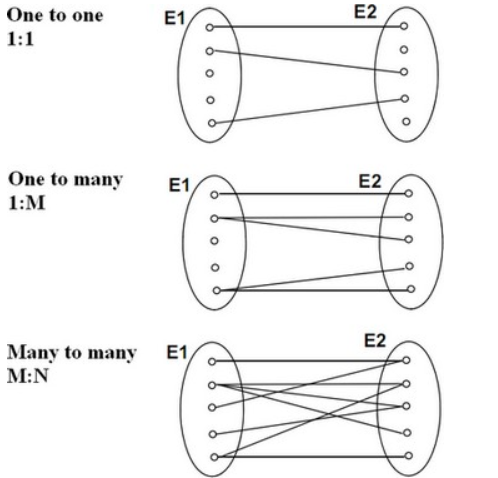

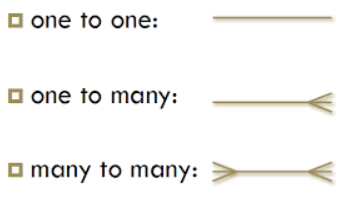

In [72]:
#====================== PANDAS MERGE ================================#
# Joins dataframe based on "key" column(s).
#   It might be one-to-one, many-to-one, or many-to-many.

# NOTE: If we do not specify the 'key' then the defaults
#         to the intersection of the columns in both DataFrames.

# 1. ONE-TO-ONE join
print(50 * '=')
print("SIMPLE EXAMPLE ONE-TO-ONE")
print(50 * '=')
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                   'hire_date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2)
print('Dataframe 1: \n', df1)
print('Dataframe 2: \n', df2)
print('Merging : \n', df3)

# 2. ONE-TO-MANY join
print(50 * '=')
print("SIMPLE EXAMPLE ONE-TO-MANY")
print(50 * '=')
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                   '_supervisor': ['Carly', 'Guido', 'Steve']})
print('Dataframe 1: \n', df3)
print('Dataframe 2: \n', df4)
print('Merging: \n', pd.merge(df3, df4))

# 3. MANY-TO-MANY JOIN
print(50 * '=')
print("SIMPLE EXAMPLE MANY-TO-MANY")
print(50 * '=')
df5 = pd.DataFrame({"group": ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    "skills": ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
print("Dataframe 1: \n", df1)
print("Dataframe 2: \n", df5)
print("Merging : \n", pd.merge(df1, df5))

# 4. Specification of the Merge key
print(50 * '=')
print("MERGING SPECIFIC KEY")
print(50 * '=')
print('\n1. Using "on" parameter\n')
print("Dataframe 1: \n", df1)
print("Dataframe 2: \n", df2)
print("Merging (specific with 'on' employee) : \n", pd.merge(df1, df2, on='employee')) # more specific in scripting
print('\n2. Using "left_on" and/or "right_on" parameter\n')
df6 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
print("Dataframe 1: \n", df1)
print("Dataframe 2: \n", df6)
print("Merging (specific with 'left_on' employee and 'right_on' name) : \n",
      pd.merge(df1, df6, left_on='employee', right_on='name'))

# 5. Type of merging
print(50 * '=')
print("TYPE OF MERGING")
print(50 * '=')
df7 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df8 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
print("Dataframe 1: \n", df7)
print("Dataframe 2: \n", df8)
print("\nMerging Inner Join : \n",
      pd.merge(df7, df8, how='inner'))
print("\nMerging Outer Join : \n",
      pd.merge(df7, df8, how='outer'))
print("\nMerging Left Join : \n",
      pd.merge(df7, df8, how='left'))
print("\nMerging Right Join : \n",
      pd.merge(df7, df8, how='right'))

# 6. Overlapping Column Names: The suffixes keyword
#      => Rename the "keyword" column that has the same name.
print(50 * '=')
print("TYPE OF MERGING")
print(50 * '=')
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df10 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                     'rank': [3, 1, 4, 2]})
print("Dataframe 1: \n", df9)
print("Dataframe 2: \n", df10)
print("Merging Inner Join : \n",
      pd.merge(df9, df10, on='name', suffixes=['_L', '_R']))

SIMPLE EXAMPLE ONE-TO-ONE
Dataframe 1: 
   employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
Dataframe 2: 
   employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
Merging : 
   employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
SIMPLE EXAMPLE ONE-TO-MANY
Dataframe 1: 
   employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
Dataframe 2: 
          group _supervisor
0   Accounting       Carly
1  Engineering       Guido
2           HR       Steve
Merging: 
   employee        group  hire_date _supervisor
0      Bob   Accounting       2008       Carly
1     Jake  Engineering       2012       Guido
2     Lisa  Engineering       2004 

# Aggregation

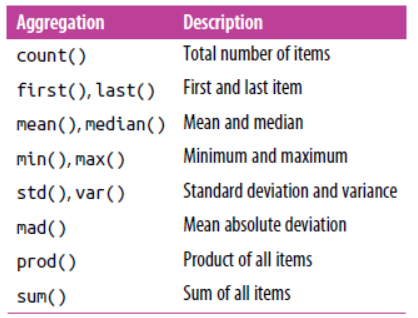

In [73]:
#======================== SIMPLE AGGREGATION IN PANDAS ==================#
print("SIMPLE AGGREGATION")
rng = np.random.RandomState(42)
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
print("Dataframe :\n", df)
print("- Dataframe mean on axis=0\n", df.mean(axis=0))
print("- Dataframe mean on axis=1\n", df.mean(axis=1))
print("- Dataframe median on axis=0\n", df.median(axis=0))
print("- Dataframe median on axis=1\n", df.median(axis=1))
print("- Dataframe min on axis=0\n", df.min(axis=0))
print("- Dataframe min on axis=1\n", df.min(axis=1))
print("- Dataframe max on axis=0\n", df.max(axis=0))
print("- Dataframe max on axis=1\n", df.max(axis=1))
print("- Dataframe product of all items on axis=0\n", df.prod(axis=0))
print("- Dataframe product of all items on axis=1\n", df.prod(axis=1))
print("- Dataframe sum on axis=0\n", df.sum(axis=0))
print("- Dataframe sum on axis=1\n", df.sum(axis=1))

SIMPLE AGGREGATION
Dataframe :
           A         B
0  0.374540  0.155995
1  0.950714  0.058084
2  0.731994  0.866176
3  0.598658  0.601115
4  0.156019  0.708073
- Dataframe mean on axis=0
 A    0.562385
B    0.477888
dtype: float64
- Dataframe mean on axis=1
 0    0.265267
1    0.504399
2    0.799085
3    0.599887
4    0.432046
dtype: float64
- Dataframe median on axis=0
 A    0.598658
B    0.601115
dtype: float64
- Dataframe median on axis=1
 0    0.265267
1    0.504399
2    0.799085
3    0.599887
4    0.432046
dtype: float64
- Dataframe min on axis=0
 A    0.156019
B    0.058084
dtype: float64
- Dataframe min on axis=1
 0    0.155995
1    0.058084
2    0.731994
3    0.598658
4    0.156019
dtype: float64
- Dataframe max on axis=0
 A    0.950714
B    0.866176
dtype: float64
- Dataframe max on axis=1
 0    0.374540
1    0.950714
2    0.866176
3    0.601115
4    0.708073
dtype: float64
- Dataframe product of all items on axis=0
 A    0.024345
B    0.003340
dtype: float64
- Dataframe p

# Groupby Pandas

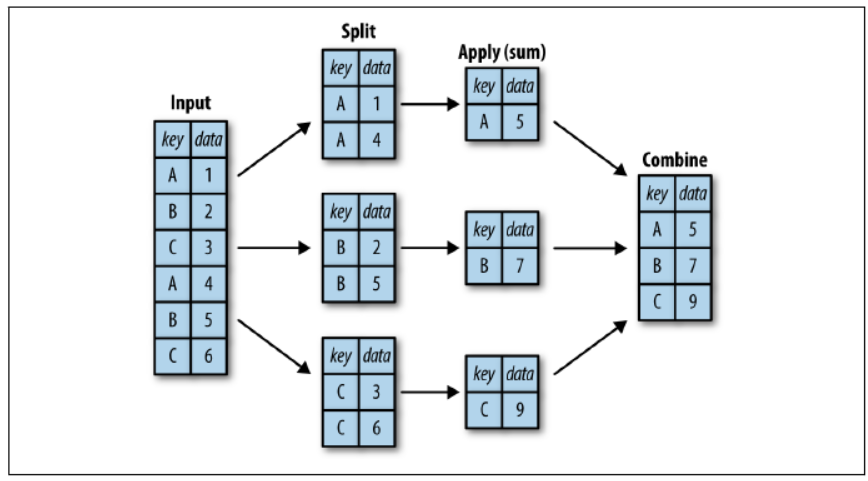

Algorithms:
1. The split step involves breaking up and grouping a DataFrame depending on the value of the specific key.

2. The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.

3. The combine step merges the results of these opeartions into an output dataframe.

**Apply vs Transform**
> “Apply() operates on the entire DataFrame while Transform() operates on a subset. Apply() returns a new DataFrame while Transform() returns a series.”

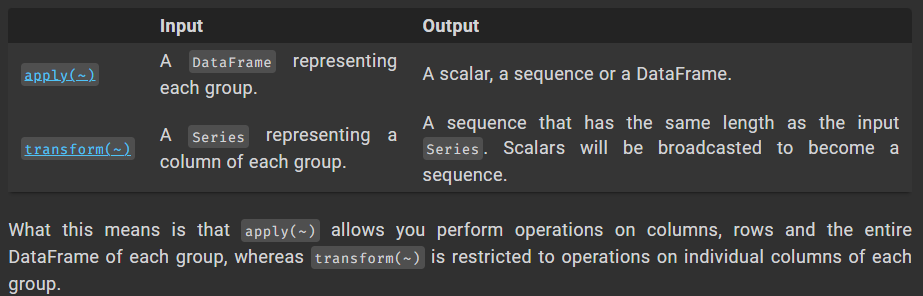

In [99]:
rng = np.random.RandomState(42)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])

print('DATA:\n', df)

print("\n1.DISPACT METHOD\n")
# NOTE: Dispact method is by applying pandas object (e.g: dataframe, series) 
#         method for aggregation directly.

print("Groupby based on 'key', and then apply sum():\n", df.groupby('key').sum())

print("\n2.AGGREGATE METHOD\n")
# NOTE: The aggregate() method allow us for even more flexibility.
#         It can take a string, a function, or a list thereof,
#         and compute all the aggregates at once.
print("Applied aggregate method:\n",
      df.groupby('key').aggregate(['min', np.median, max]))
print("Applied aggregate method (more specific):\n",
      df.groupby('key').aggregate({'data1': 'min',
                                   'data2': max}))

print("\n3.FILTER METHOD\n")
# A filtering operation allows you to drop data based on the group properties.
# NOTE: function should return a Boolean value specifying whether the group
#       passes the filtering.

def filter_func(x):
    return x['data2'].std() > 1.5

print("\nGroupby based on 'key', then apply std() =\n",
      df.groupby('key').std())
print("\nGroupby apply filter for 'key' that (std data2 > 1.5) =\n",
      df.groupby('key').filter(filter_func))


print("\n4.TRANSFORM METHOD\n")
# Transformation can return some transformed version (have same size of applied object) 
#   of the full data to recombine.

print("Groupby apply mean() =\n",
      df.groupby('key').mean())
print("Groupby based on 'key' then transform each column with x - x.mean() =\n",
      df.groupby('key').transform(lambda x: x - x.mean()))

print("\n5.APPLY METHOD\n")
# To applied function to DataFrame or Series at the specific row or column

def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] = x['data2'].sum()
    return x

print("Dataframe =\n", df)
print("Groupby based on 'key' then apply function\n",
      df.groupby('key', group_keys=False).apply(norm_by_data2))

DATA:
   key  data1  data2
0   A      0      6
1   B      1      3
2   C      2      7
3   A      3      4
4   B      4      6
5   C      5      9

1.DISPACT METHOD

Groupby based on 'key', and then apply sum():
      data1  data2
key              
A        3     10
B        5      9
C        7     16

2.AGGREGATE METHOD

Applied aggregate method:
     data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     4    5.0   6
B       1    2.5   4     3    4.5   6
C       2    3.5   5     7    8.0   9
Applied aggregate method (more specific):
      data1  data2
key              
A        0      6
B        1      6
C        2      9

3.FILTER METHOD


Groupby based on 'key', then apply std() =
        data1     data2
key                   
A    2.12132  1.414214
B    2.12132  2.121320
C    2.12132  1.414214

Groupby apply filter for 'key' that (std data2 > 1.5) =
   key  data1  data2
1   B      1      3
4   B      4

# Pivot Table

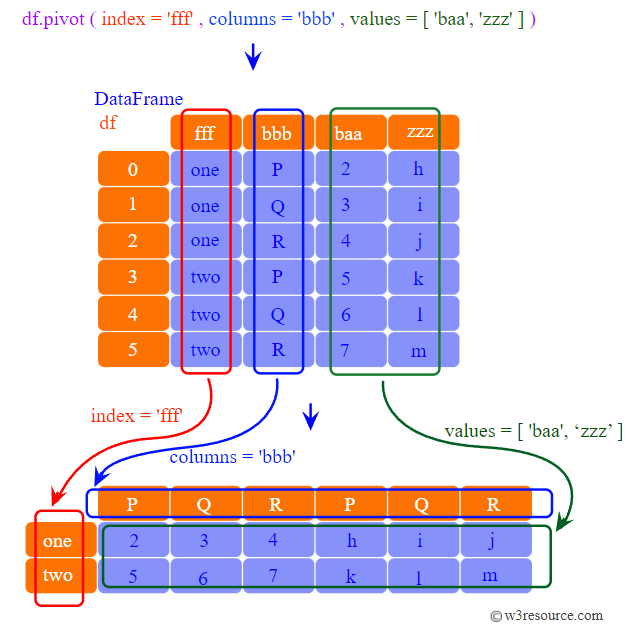

In [100]:
df = pd.DataFrame({'A': ['John', 'Boby', 'Mina', 'Peter', 'Nicky'],
      'B': ['Masters', 'Graduate', 'Graduate', 'Masters', 'Graduate'],
      'C': [27, 23, 21, 23, 24]})

# Creates a pivot table dataframe
table = pd.pivot_table(df, values ='A', index =['B', 'C'],
                         columns =['B'], aggfunc = np.sum)

print("Actual data=\n", df)
print("Pivot table=\n", table)

Actual data=
        A         B   C
0   John   Masters  27
1   Boby  Graduate  23
2   Mina  Graduate  21
3  Peter   Masters  23
4  Nicky  Graduate  24
Pivot table=
 B           Graduate Masters
B        C                  
Graduate 21     Mina     NaN
         23     Boby     NaN
         24    Nicky     NaN
Masters  23      NaN   Peter
         27      NaN    John


# Vectorized String Operations

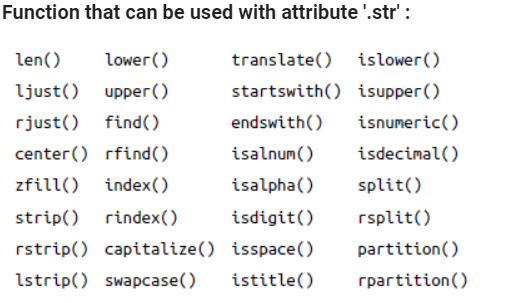

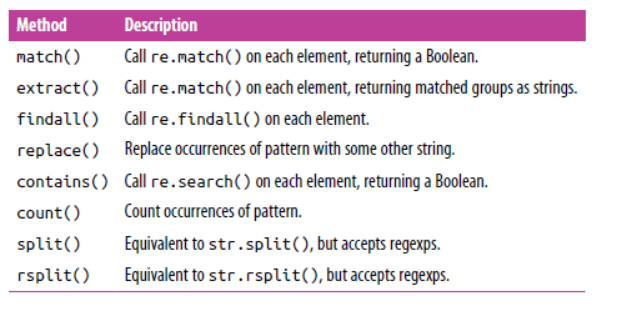

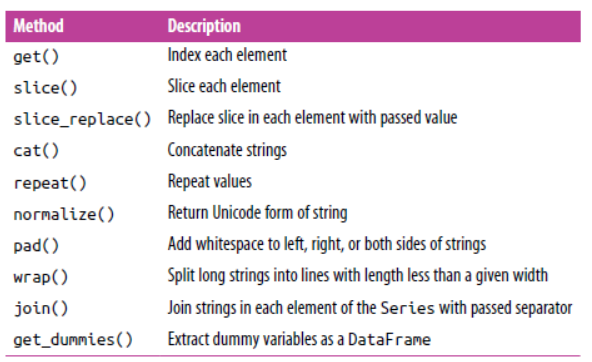

In [ ]:
#==================== METHODS SIMILAR TO PYTHON STRING METHODS ================#
# Using tab completion on this 'str' attribute will list all
#   the vectorized string methods available to Pandas
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
print("Initial data =\n", monte)
print("Calculate length every elements =\n", monte.str.len())
print("Splitting every elements =\n", monte.str.split())

#=================== METHODS USING REGULAR EXPRESSIONS ====================#
print("Initial data:\n", monte)
print("Extract the first name from each values:\n",
      monte.str.extract('([A-Za-z]+)'))


# Time Series

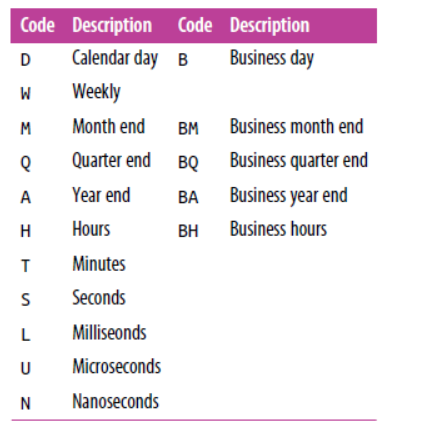

In [101]:
#===================== PANDAS TIME SERIES: INDEXING BY TIME =====================#
print("DATETIME INDEX")
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
print("Index data dtype =", data.index.dtype)
print("Actual data =\n", data)
print("Slicing index datetime =\n",
      data['2014-07-04':'2015-07-04'])
print("Get value at specific year (in this case 2015) =\n",
      data['2015'])

#====================== PANDAS TIME SERIES DATA STRUCTURES ======================#
print("\nTIME SERIES DATA STRUCTURES")
# 1. pandas to_datetime() -> Return DatetimeIndex object
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
print("Pandas DatetimeIndex =\n", dates)

# 2. pandas to_period() -> Convert DatetimeIndex to PeriodIndex object
print("Pandas PeriodIndex =\n", dates.to_period('D'))

# 3. TimedeltaIndex -> when one date is substracted from another
print("TimedeltaIndex =\n", dates - dates[0])

#=================== REGULAR SEQUENCE =======================#
print("\nREGULAR SEQUENCE")
print("Start from x-date to y-date:\n", pd.date_range(start='2015-07-03',
                                                   end='2015-07-10',))
print("Start from x-date to y-date each 2 days step:\n", pd.date_range(start='2015-07-03',
                                                                   end='2015-07-10',
                                                                   freq='2D'))
print("Start from x-date and generate n-periods:\n", pd.date_range(start='2015-07-03',
                                                                   periods=8))
print("Start from x and generate n-periods with specific freq:\n",
      pd.date_range(start=0, periods=9, freq="2H30T")) #2H30T = 2 Hours and 30 Minutes
print("Start from x and generate n-periods with specific freq (applied Offset object):\n",
      pd.date_range(start=0, periods=9, freq=DateOffset(n=2))) #2H30T = 2 Hours and 30 Minutes

#====================== MANIPULATION DATETIME ===================#
print("\nTimedelta pandas:")
td = pd.Timedelta(value=1, unit='D')
print("Initial date =\n", dates)
print("After some manipulation = dates + td\n", dates + td)

DATETIME INDEX
Index data dtype = datetime64[ns]
Actual data =
 2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64
Slicing index datetime =
 2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64
Get value at specific year (in this case 2015) =
 2015-07-04    2
2015-08-04    3
dtype: int64

TIME SERIES DATA STRUCTURES
Pandas DatetimeIndex =
 DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)
Pandas PeriodIndex =
 PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')
TimedeltaIndex =
 TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

REGULAR SEQUENCE
Start from x-date to y-date:
 DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
            